In [2]:
using BenchmarkTools: @btime
import LinearAlgebra as la
using TensorOperations: @tensor

In [29]:
import Plots as plt

In [6]:
path = "../../"
include(path * "Systems/system.jl")
include(path * "Methods/HF.jl")
include(path * "Methods/CCD.jl")
include(path * "Methods/CCSD.jl")

## Pairing Basis and Pairing System

In [134]:
g_values = -1:0.1:1
l = 8
n = 4

function CCSD_pairing_energy(g, l, n)
    basis = Pairing(l, g)
    system = System(n, basis);
    
    ccsd = setup_CCSD(system, α = 0.5);
    
    for i in 1:10
        CCSD_Update!(ccsd)
    end
    
    return energy(ccsd)
end

function CCD_pairing_energy(g, l, n)
    basis = Pairing(l, g)
    system = System(n, basis);
    
    ccd = setup_CCD(system, α = 0.5);
    
    for i in 1:10
        CCD_Update!(ccd)
    end
    
    return energy(ccd)
end;

In [111]:
reference_es = (2 .- g_values)

ccsd_es = CCSD_pairing_energy.(g_values, l, n) .- reference_es;
ccd_es = CCD_pairing_energy.(g_values, l, n) .- reference_es;
exact_es = pairing_exact.(g_values) .- reference_es;
mbpt2_es = pairing_MBPT2.(g_values) .- reference_es;

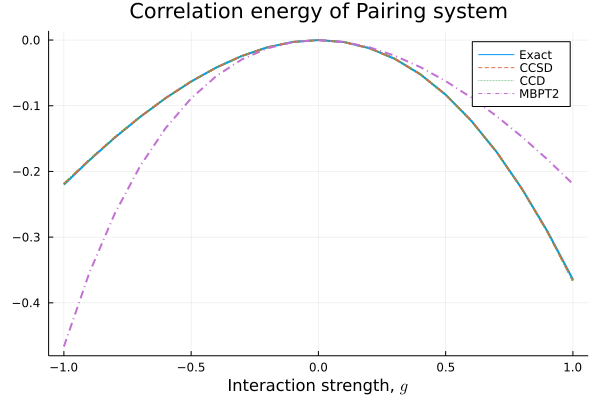

In [133]:
plt.plot(title="Correlation energy of Pairing system", xlabel="Interaction strength, \$g\$")
plt.plot!(g_values, exact_es, label="Exact", ls=:solid, lw=2)
plt.plot!(g_values, ccsd_es, label="CCSD", ls=:dash, lw=2)
plt.plot!(g_values, ccd_es, label="CCD", ls=:dot, lw=2)
plt.plot!(g_values, mbpt2_es, label="MBPT2", ls=:dashdot, lw=2)